## <h2 style="color:Red; text-align:center;"> Fashion MNIST Datset<h2>
<br>**Problem Statement**<br>
- The Fashion MNIST dataset consists of 70,000 grayscale images, each 28x28 pixels in size, representing 10 categories of clothing items such as shirts, shoes, and dresses. 
- Each image is associated with a label indicating its category. The dataset serves as a more challenging alternative to the traditional MNIST handwritten digit dataset, providing a benchmark for image classification tasks.
- The objective is to build a  Convolutional Neural Network (CNN) model to accurately classify these images into their respective categories

#### <h4 style="color:blue; "> Load Environment <h4>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random

import warnings
warnings.filterwarnings("ignore")

In [54]:
%matplotlib inline

#### <h4 style="color:blue; "> Load Dataset <h4>

In [55]:
# Importing the dataset
from tensorflow.keras.datasets import fashion_mnist
fs=fashion_mnist.load_data()

In [56]:
(x_train, y_train), (x_test, y_test)=fs

In [57]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [58]:
# It contains the labesl of each category
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

#### <h4 style="color:blue; "> Get images <h4>

The description of the images
 Label | Description |
|:-----:|-------------|
|   0   | T-shirt/top |
|   1   | Trouser     |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle boot  |

In [59]:
# Creating the dictionary of all the catogories
fashion_mnist_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}


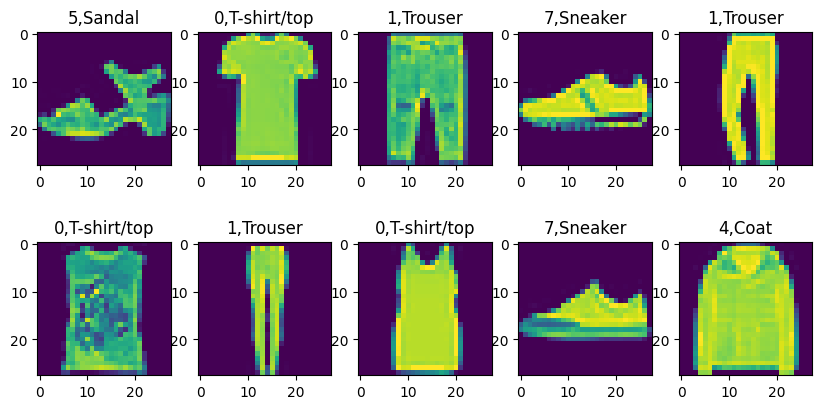

In [60]:
# plotting the categories using subplots
fig,axes=plt.subplots(2,5,figsize=(10,5))
axes=axes.ravel()
for i in range(10):
    x=random.randint(0,len(x_train)-1)
    axes[i].imshow(x_train[x])
    axes[i].set_title(f"{y_train[x]},{fashion_mnist_labels[y_train[x]]}")
    
    
    

#### <h4 style="color:blue; "> Build CNN <h4>

In [61]:
# Normalizing the data to a range of 0 to 1, as the pixel values range from 0 to 255
x_train = x_train / 255.0
x_test = x_test / 255.0


In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Creating a sequential model
model_cnn1 = Sequential()

# Add a Conv2D layer
model_cnn1.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a MaxPooling2D layer
model_cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Add a second Conv2D layer
model_cnn1.add(layers.Conv2D(64, (3, 3), activation="relu"))
model_cnn1.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model_cnn1.add(layers.Flatten())

# Add a Dense layer with 64 units and ReLU activation
model_cnn1.add(layers.Dense(units=64, activation="relu"))

# Add a Dropout layer for regularization (optional but helps prevent overfitting)
model_cnn1.add(layers.Dropout(0.5))

# Add the output layer with 10 units (for 10 classes) and softmax activation
model_cnn1.add(layers.Dense(units=10, activation="softmax"))



In [63]:
model_cnn1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)

In [65]:
from tensorflow.keras.optimizers import Adam
optimizers=Adam(learning_rate=0.001)

In [66]:
model_cnn1.compile(optimizer=optimizers,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [67]:
epoch_hist=model_cnn1.fit(x_train,y_train,epochs=150,batch_size=512,callbacks=[early_stop],validation_data=(x_test,y_test))

Epoch 1/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.4822 - loss: 1.4933 - val_accuracy: 0.7783 - val_loss: 0.6056
Epoch 2/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.7417 - loss: 0.7216 - val_accuracy: 0.8161 - val_loss: 0.4933
Epoch 3/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - accuracy: 0.7853 - loss: 0.5971 - val_accuracy: 0.8312 - val_loss: 0.4661
Epoch 4/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8014 - loss: 0.5514 - val_accuracy: 0.8482 - val_loss: 0.4217
Epoch 5/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.8141 - loss: 0.5116 - val_accuracy: 0.8546 - val_loss: 0.4077
Epoch 6/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.8243 - loss: 0.4890 - val_accuracy: 0.8633 - val_loss: 0.3766
Epoch 7/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.8323 - loss: 0.4646 - val_accuracy: 0.8642 - val_loss: 0.3723
Epoch 8/150
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 95ms/step - accuracy: 0.8406 - loss: 0.44

In [77]:
epoch_hist.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [78]:
len(epoch_hist.history["loss"])

53

Text(0.5, 1.0, 'Loss wrt epochs')

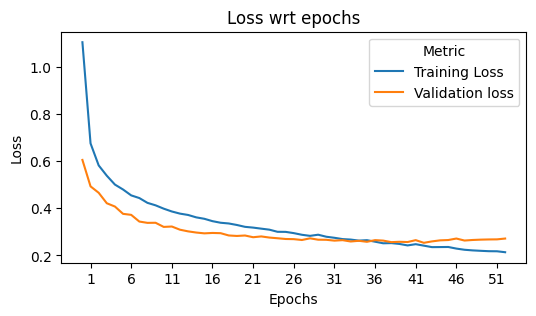

In [79]:
epochs=len(epoch_hist.history["loss"])+1
plt.figure(figsize=(6,3))
plt.plot(epoch_hist.history["loss"],label="Training Loss")
plt.plot(epoch_hist.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(title="Metric")
plt.xticks(np.arange(1,epochs,5));
plt.title("Loss wrt epochs")


---
**Inference**

---
- Trainning loss decreases wrt number of epochs.it show sthe model is learning the patterns and fits better wrt to tarining data
- Validation loss decreased gradually initally and stabilizes after some time. It is very near to the validation loss and is generalisng the data that it has not seen very well
- No overfitting as the validation loss does not change significantly or does not diverge from training loss
- The model is converging
---

In [80]:
pred1=model_cnn1.predict(x_test)
pred1[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.5957904e-14, 6.9702619e-17, 1.1497624e-17, 6.5787551e-16,
       3.3890983e-18, 1.2887372e-07, 5.1014981e-17, 4.1184076e-06,
       2.1594431e-13, 9.9999571e-01], dtype=float32)

In [81]:
pred1_classes = np.argmax(pred1, axis=1)
pred1_classes

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,pred1_classes)
cm

array([[871,   0,  19,  16,   5,   1,  83,   0,   5,   0],
       [  1, 974,   1,  17,   2,   0,   3,   0,   2,   0],
       [ 13,   0, 837,  10,  54,   0,  84,   0,   2,   0],
       [ 20,   2,   7, 910,  27,   0,  32,   0,   2,   0],
       [  1,   0,  28,  29, 872,   0,  69,   0,   1,   0],
       [  0,   0,   0,   0,   0, 978,   0,  16,   0,   6],
       [119,   0,  46,  30,  63,   0, 733,   0,   9,   0],
       [  0,   0,   0,   0,   0,  14,   0, 967,   0,  19],
       [  1,   0,   0,   3,   4,   1,   6,   3, 981,   1],
       [  1,   0,   0,   0,   0,   3,   0,  37,   0, 959]], dtype=int64)

In [83]:
labels=[fashion_mnist_labels[i] for i in range(10)]
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

<Axes: >

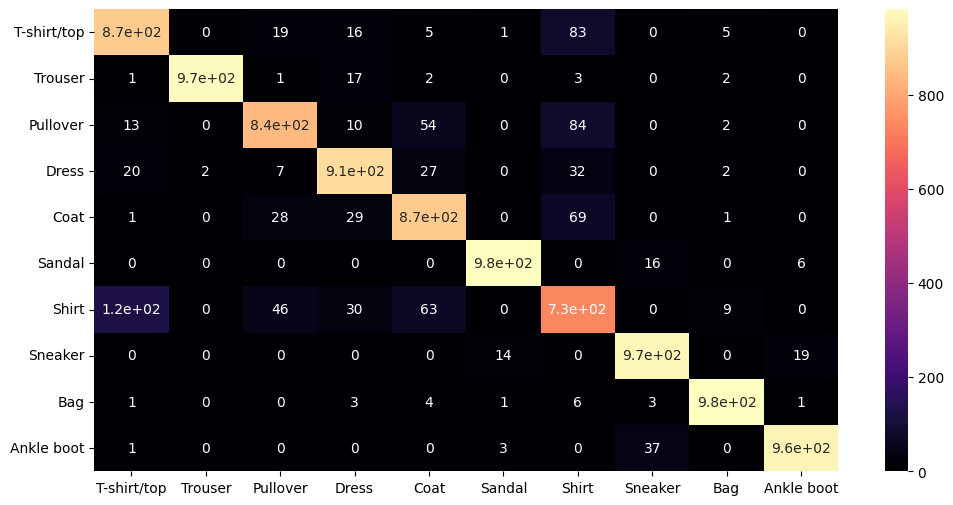

In [84]:
plt.figure(figsize=(12,6))
sns.heatmap(cm,yticklabels=labels,xticklabels=labels,annot=True,cmap="magma")

In [85]:
print(classification_report(y_test,pred1_classes,target_names=labels))

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.87      0.86      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.89      0.84      0.86      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.85      0.87      0.86      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.73      0.73      0.73      1000
     Sneaker       0.95      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



---
**`Inference from the heatmap of confusion matrix and classification report`**

---
- **Model Overal Performance**:
  - `Acuuracy:91%`
  - `Precision:91%`
  - `Recall:91%`
  - `F1 Score:91%`
- `Trouser`,`Sandle`,`Ankle boot`,`Bag` have the highest accuracy in classification
- `shirt` has been mislabelled the most as `Tshirt`,`Pullover`,`Coat` .It is okay as they all have similar features

**Despite these challenges, the overall performance is robust, suitable for practical applications.**